## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [4]:
picture_size = 48
folder_path = "C:/Users/Rohith G.V/Desktop/data science projects/Emotion detection/images/"

## Display image

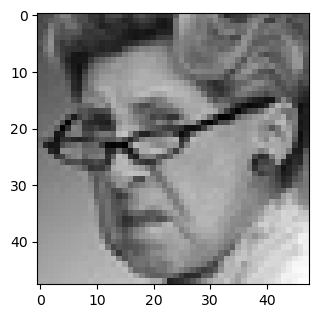

In [5]:
expression ='angry'
plt.figure(figsize= (12,12))
for i in range (1, 10, 1):
    plt.subplot(3,3,1)
    img= load_img (folder_path+"train/"+expression+"/"+
        os.listdir (folder_path + "train/" + expression) [i], target_size=(picture_size, picture_size))
    plt. imshow(img)
plt.show()

### Train And Test Data Split

In [6]:
batch_size = 128
datagen_train = ImageDataGenerator () 
datagen_val= ImageDataGenerator ()
train_set = datagen_train.flow_from_directory (folder_path+"train",
                                                target_size = (picture_size, picture_size),
                                                color_mode = "grayscale",
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)
test_set = datagen_train.flow_from_directory (folder_path+"validation",
                                                target_size = (picture_size, picture_size),
                                                color_mode = "grayscale",
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### Model Building

In [7]:
no_of_classes = 7

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1))) #64 filters 3,3 cernelsize input shape is 48,48 and 1 is grayscale
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # maxpooling extracts important information
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

D:\ana\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Fittting the model with Training And Validation Date

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Output", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping (monitor=' val_loss',
                                min_delta=0,
                                patience=3,
                                verbose=1,
                                restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau (monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
epochs = 48

In [9]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n // train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n // test_set.batch_size,
                    callbacks=callbacks_list)


Epoch 1/48
225/225 [==============================] - 196s 844ms/step - loss: 2.0210 - accuracy: 0.2418 - val_loss: 1.6663 - val_accuracy: 0.3537 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - 407s 2s/step - loss: 1.7619 - accuracy: 0.3251 - val_loss: 1.6220 - val_accuracy: 0.3768 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - 391s 2s/step - loss: 1.6606 - accuracy: 0.3658 - val_loss: 1.5585 - val_accuracy: 0.4071 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - 140s 625ms/step - loss: 1.5771 - accuracy: 0.3958 - val_loss: 1.4961 - val_accuracy: 0.4247 - lr: 1.0000e-04
Epoch 5/48
225/225 [==============================] - 36s 159ms/step - loss: 1.5209 - accuracy: 0.4195 - val_loss: 1.4968 - val_accuracy: 0.4469 - lr: 1.0000e-04
Epoch 6/48
225/225 [==============================] - 36s 160ms/step - loss: 1.4552 - accuracy: 0.4441 - val_loss: 1.5261 - val_accuracy: 0.4428 - lr: 1.0000e-04
Epoch 7/48
225/225 [==========

225/225 [==============================] - 36s 162ms/step - loss: 1.0743 - accuracy: 0.5911 - val_loss: 1.1233 - val_accuracy: 0.5844 - lr: 2.0000e-05
Epoch 36/48
225/225 [==============================] - 36s 161ms/step - loss: 1.0723 - accuracy: 0.5960 - val_loss: 1.1164 - val_accuracy: 0.5871 - lr: 2.0000e-05
Epoch 37/48
225/225 [==============================] - 37s 164ms/step - loss: 1.0583 - accuracy: 0.5973 - val_loss: 1.1035 - val_accuracy: 0.5905 - lr: 2.0000e-05
Epoch 38/48
225/225 [==============================] - 37s 163ms/step - loss: 1.0555 - accuracy: 0.5988 - val_loss: 1.1012 - val_accuracy: 0.5947 - lr: 2.0000e-05
Epoch 39/48
225/225 [==============================] - 37s 165ms/step - loss: 1.0414 - accuracy: 0.6049 - val_loss: 1.1144 - val_accuracy: 0.5881 - lr: 2.0000e-05
Epoch 40/48
225/225 [==============================] - 36s 162ms/step - loss: 1.0346 - accuracy: 0.6074 - val_loss: 1.1092 - val_accuracy: 0.5915 - lr: 2.0000e-05
Epoch 41/48
225/225 [=============

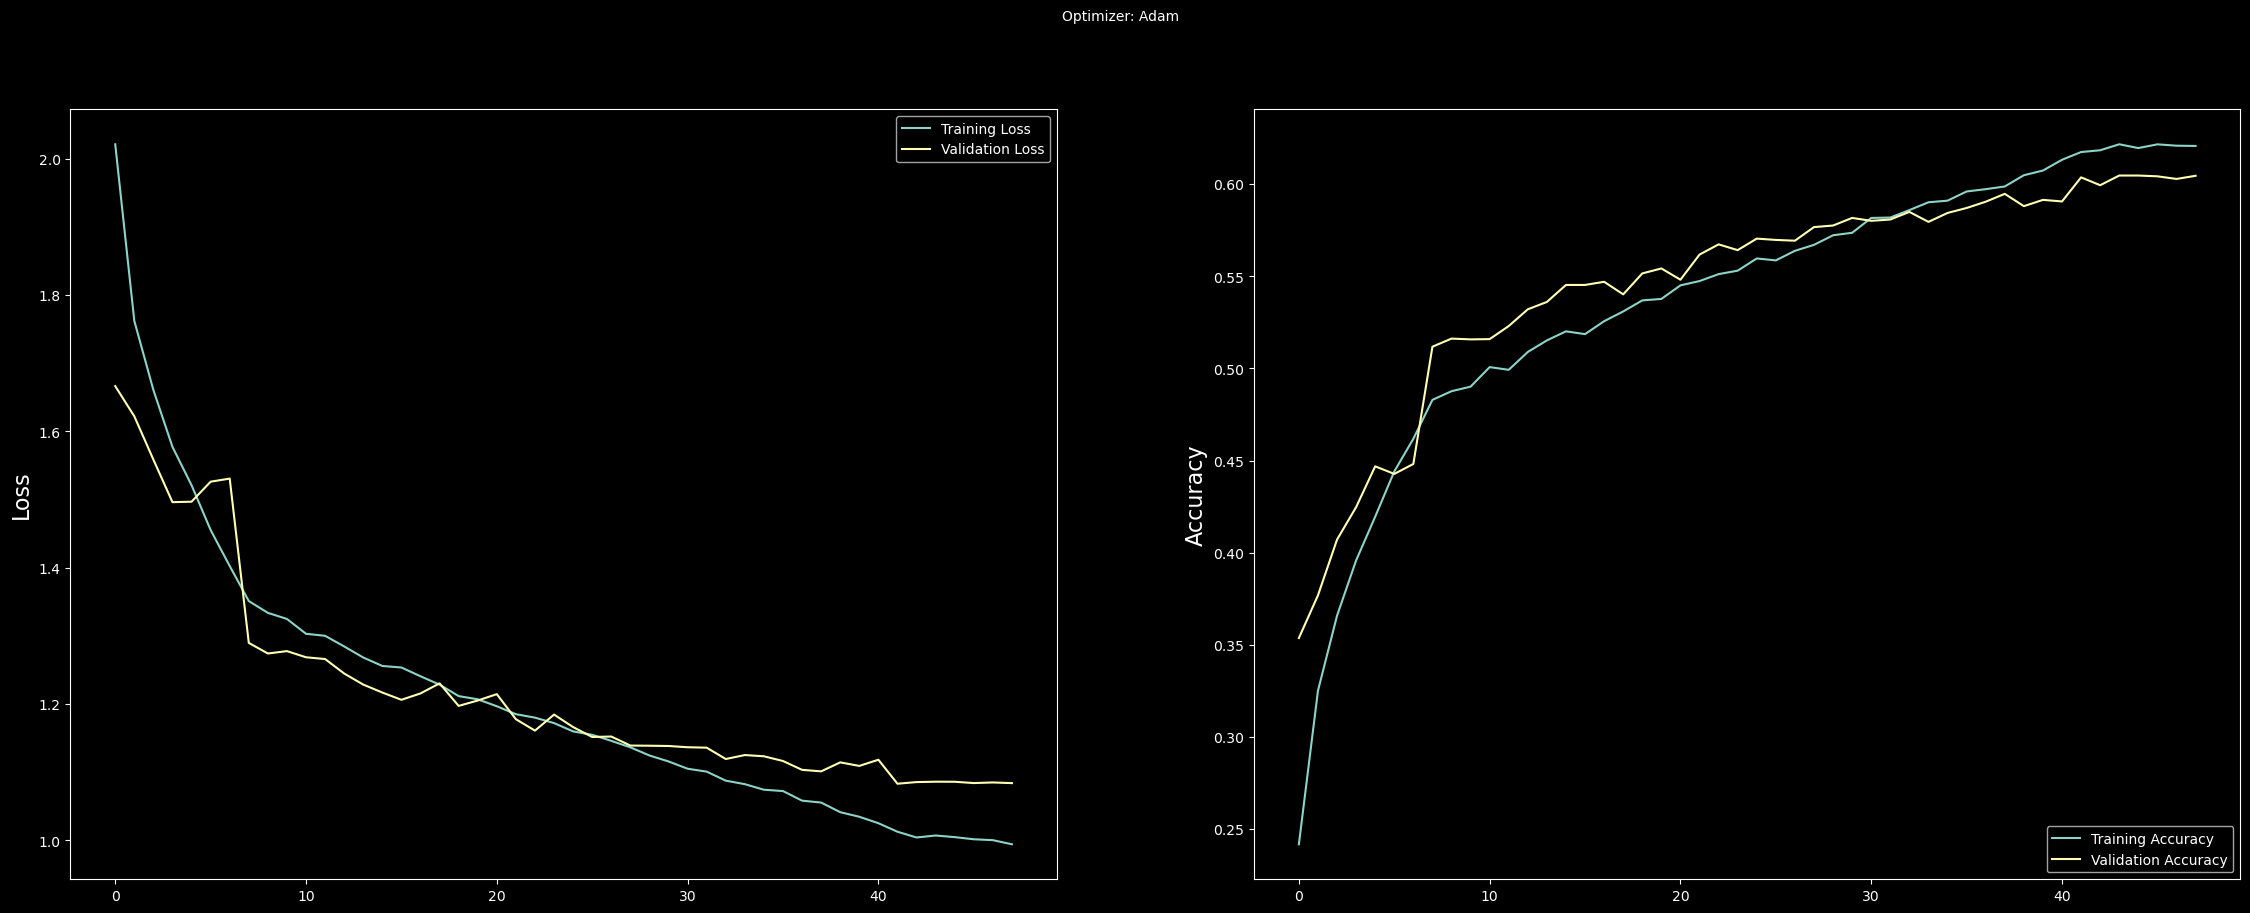

In [10]:
plt.style.use('dark_background')


plt. figure(figsize=(28,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend (loc='upper right')
plt. subplot (1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend (loc= 'lower right')
plt.show()

In [14]:
from tensorflow.keras.models import load_model
model.save("C://Users//Rohith G.V//Desktop//data science projects//Emotion detection//model.h5")